# K-MEANS CLUSTERING

### PUNTI DA CHIARIRE:
##### - questione variables da mettere negli assi  --> chat dice che bisogna trovare le variabili che sono correlate tra di loro (vedere correlation matrix su report)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans
from sklearn.cluster import KMeans
#evaluation
from sklearn.metrics import silhouette_score

In [27]:
pp_train = pd.read_csv("pp_train.csv")
#df = pd.read_csv("df_pp_log.csv")
pp_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,is_Fantasy,is_Family,is_Mystery,is_Talk-Show,is_Drama,is_Sport,is_War,is_Horror,is_Animation,fill_runtimeMinutes
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,0,21,...,0,0,0,0,0,0,0,0,1,40.0
1,Looping,6,1982,NaN,NaN,0.0,11,1,0,1,...,0,0,0,0,0,0,0,0,0,28.0
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,0,24,...,0,0,0,0,0,0,0,0,0,90.0
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,0,0,0,0,0,0,0,0,0,31.0
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,0,0,0,0,1,0,0,0,0,80.0


In [28]:
pp_train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'countryOfOrigin', 'is_Documentary', 'is_History', 'is_Adventure',
       'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance',
       'is_Biography', 'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir',
       'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime',
       'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show',
       'is_Drama', 'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes'],
      dtype='object')

#### definizione delle feature da usare per clustering

In [29]:
#features = df[['fill_runtimeMinutes', "numVotes"]]
features = pp_train[["awardWins", "numVotes", "totalImages", "totalVideos", "totalCredits", "criticReviewsTotal", "awardNominationsExcludeWins", "numRegions", "userReviewsTotal", "fill_runtimeMinutes"]]
X = features.values

#### mapping della variabile target (per noi è titleType) così da confrontarla dopo con gli eventuali cluster/individuare quali cluster contengono un'alta percentuale di quale categoria di titleType

In [30]:
y = np.array(pp_train['titleType'])
y_map = {"tvEpisode": 0, "videoGame": 1, "movie": 2, "tvSeries": 3, "video": 4,
         "tvMiniSeries": 5, "short": 6, "tvMovie": 7, "tvSpecial": 8, "tvShort": 9}

y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map) #target label

### normalizzazione con z-score e minmax

In [31]:
scaler = StandardScaler() 
scaler.fit(X) #x è la numpy matrix of the dataset
X_scal = scaler.transform(X)

In [32]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

### inizializzazione modello

In [33]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100, random_state=94) #inizializziamo algoritmo, fit it per lavorare sull'exact data
#iniziamo con 3 cluster, 10 iterations, random_state: allows to have the same result 

kmeans.fit(X_scal)
#kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=94)

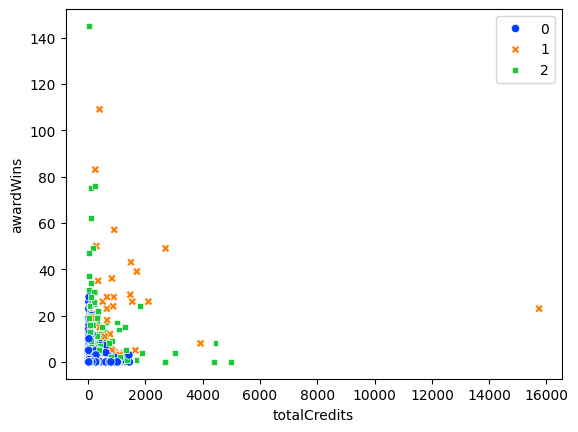

In [34]:
sns.scatterplot(data=df, 
                x="totalCredits",
                y="awardWins",
                hue=kmeans.labels_,
                style=kmeans.labels_, #usiamo labels date da k-means
                palette="bright")
plt.show()

### identificazione dei centroidi

In [35]:
kmeans.cluster_centers_ #coordinates with centroids

array([[-0.06473094, -0.06317497, -0.07285804, -0.05343306, -0.06128853,
        -0.11498041, -0.07617796, -0.15502143, -0.07571234, -0.03662892],
       [ 7.84655227, 14.21590753,  6.37948653,  8.99230806,  6.5841921 ,
        12.07864589, 12.35564685,  7.28351212, 12.58173938,  0.87084588],
       [ 1.10913771,  0.64036672,  1.41371015,  0.74598497,  1.10712501,
         2.09547026,  1.09483889,  3.43203911,  1.06781328,  0.868244  ]])

In [36]:
centers = scaler.inverse_transform(kmeans.cluster_centers_) #from normalized to input domain
centers

array([[-9.38598622e+00, -6.10573995e+04, -2.55294572e+02,
        -1.37857286e+01, -9.64804028e+02, -6.12845571e+01,
        -1.50070591e+01, -9.54145729e+00, -4.33604561e+02,
        -1.09886757e+02],
       [ 1.13775008e+03,  1.37405326e+07,  2.23537208e+04,
         2.32001548e+03,  1.03648352e+05,  6.43791826e+03,
         2.43406243e+03,  4.96278824e+02,  7.20556214e+04,
         2.61253763e+03],
       [ 1.60824969e+02,  6.18957861e+05,  4.95364037e+03,
         1.92464122e+02,  1.74283620e+04,  1.11688565e+03,
         2.15683261e+02,  2.34378660e+02,  6.11536663e+03,
         2.60473200e+03]])

In [37]:
pp_train['kmeans_labels'] = kmeans.labels_
pp_train['kmeans_labels'] = pp_train['kmeans_labels'].map({0:"A", 1: "B", 2: "C"})

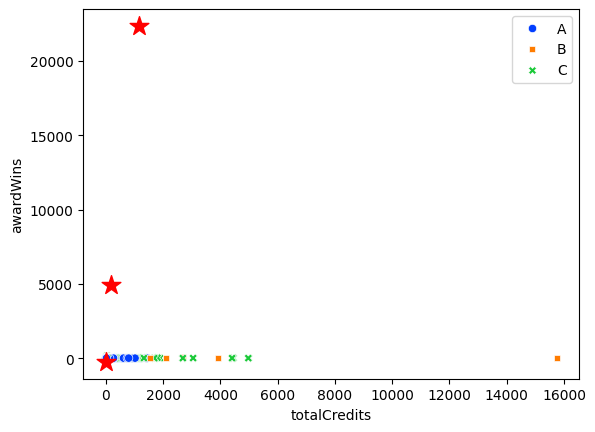

In [38]:
sns.scatterplot(data=pp_train, 
                x="totalCredits", 
                y="awardWins", 
                hue='kmeans_labels', 
                style='kmeans_labels',
                palette="bright", 
                hue_order=["A", "B", "C"]
               )
plt.legend()
#qui è giusto che centers sia :,1 se in quello di fedele dice [:,2]?
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200) #plotting the centroids
plt.show()

### conronto con target variable

In [39]:
y_mapped

0        0
1        1
2        2
3        3
4        3
        ..
16426    2
16427    2
16428    2
16429    2
16430    6
Name: 0, Length: 16431, dtype: int64

In [40]:
y_mapped.groupby(pp_train['kmeans_labels']).value_counts(normalize=True)

kmeans_labels  0
A              0    0.297983
               1    0.016111
C              1    0.008026
               2    0.784912
B              2    0.714286
A              2    0.318153
B              3    0.285714
C              3    0.155698
A              3    0.080299
               4    0.049664
C              4    0.014446
               5    0.016051
A              5    0.013574
               6    0.156603
C              6    0.008026
A              7    0.054611
C              7    0.011236
A              8    0.010466
C              8    0.001605
A              9    0.002537
Name: proportion, dtype: float64

### metrics

In [41]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 108376.93693784493
Silhouette 0.8248071809519472


In [42]:
%%time
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

CPU times: total: 12 s
Wall time: 22.5 s


In [43]:
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sil_list.append(silhouette_score(X_minmax, kmeans.labels_))

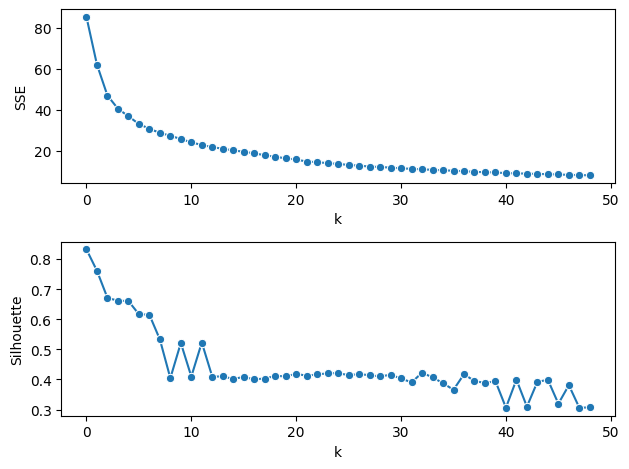

In [44]:
fig, axs = plt.subplots(2) 

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout()